In [1]:
from trbox.trader import Trader
from trbox.strategy import Strategy
from trbox.strategy.presets.benchmark import BuyAndHold
from trbox.market.localcsv import RollingWindow
from trbox.event.market import TradeTick, OhlcvWindow
from trbox.trader.dashboard import Dashboard
from trbox.common.logger import Log
from trbox.common.logger.parser import Memo
from trbox.broker.paper import PaperEX


In [2]:
SYMBOL = 'BTC'
PCT_TARGET = 0.7
START = '2020-01-01'
END = None
LENGTH = 200

In [3]:
t = Trader(
    strategy=BuyAndHold(SYMBOL, PCT_TARGET),
    market=RollingWindow(
        symbols=(SYMBOL, ),
        source=lambda s: f'_data_/{s}_bar1day.csv',
        start=START,
        end=END,
        length=LENGTH),
    broker=PaperEX(SYMBOL)
)


In [4]:

t.run()


In [5]:
t.dashboard.trade_reacords.head()

,Symbol,Action,Quantity,Price,GrossProceeds,Fees,NetProceeds
Date,,,,,,,
2020-01-01,BTC,BUY,97.510963,7182.269340,-700350.000000,700.350000,-701050.350000
2020-01-06,BTC,SELL,-2.184201,7758.858630,16946.909743,16.946910,16929.962833
2020-01-07,BTC,SELL,-1.518548,8154.930495,12383.656618,12.383657,12371.272961
2020-01-14,BTC,SELL,-2.071142,8808.633480,18243.929421,18.243929,18225.685491
2020-01-23,BTC,BUY,1.418826,8382.629220,-11893.490641,11.893491,-11905.384132


<AxesSubplot: >

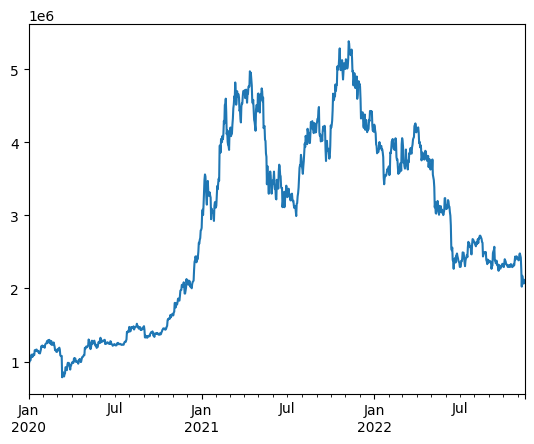

In [6]:
t.dashboard.navs.plot()